Analyse traffic accident data to identify patterns related to road conditions,weather and time of day.Visualize accident hotspots and contributing factors.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("/content/US_Accidents_March23.csv")

<ipython-input-2-7bc8b052af34>:2: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/US_Accidents_March23.csv")


In [4]:
# Print the column names to check for correct names
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [5]:
# Select relevant columns for analysis
selected_columns = ['Start_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition', 'Description', 'Severity']
df = df[selected_columns]

In [6]:
# Convert Start_Time to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

<ipython-input-6-f6387c98c008>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start_Time'] = pd.to_datetime(df['Start_Time'])


In [7]:
# Extract hour of the day from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

<ipython-input-7-dcf91b1b1753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Start_Time'].dt.hour


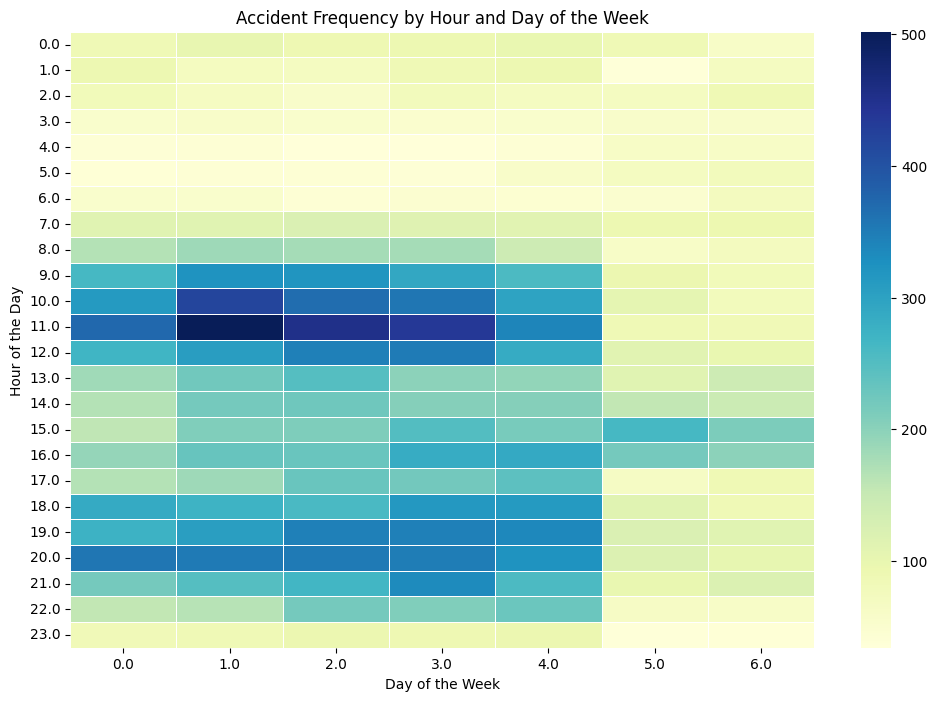

In [8]:
# Plot heatmap of accident frequency by hour and day of the week
heatmap_data = df.groupby(['Hour', df['Start_Time'].dt.dayofweek])['Severity'].count().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Accident Frequency by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

<ipython-input-9-2668dcd131d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().iloc[:10].index, palette='viridis')


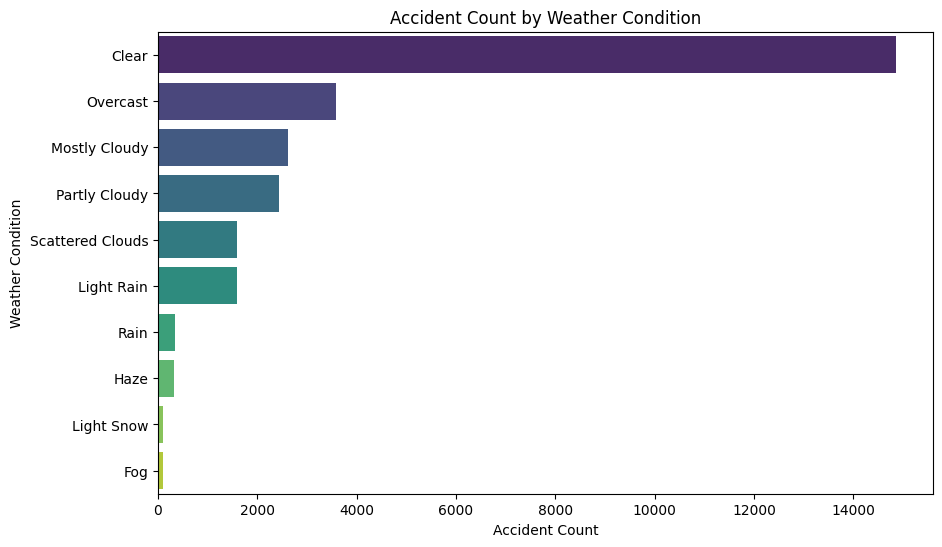

In [9]:
# Plot bar chart of accident count by weather condition
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Accident Count by Weather Condition')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.show()

<ipython-input-10-266ea2903d28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Description', data=df, order=df['Description'].value_counts().iloc[:10].index, palette='magma')


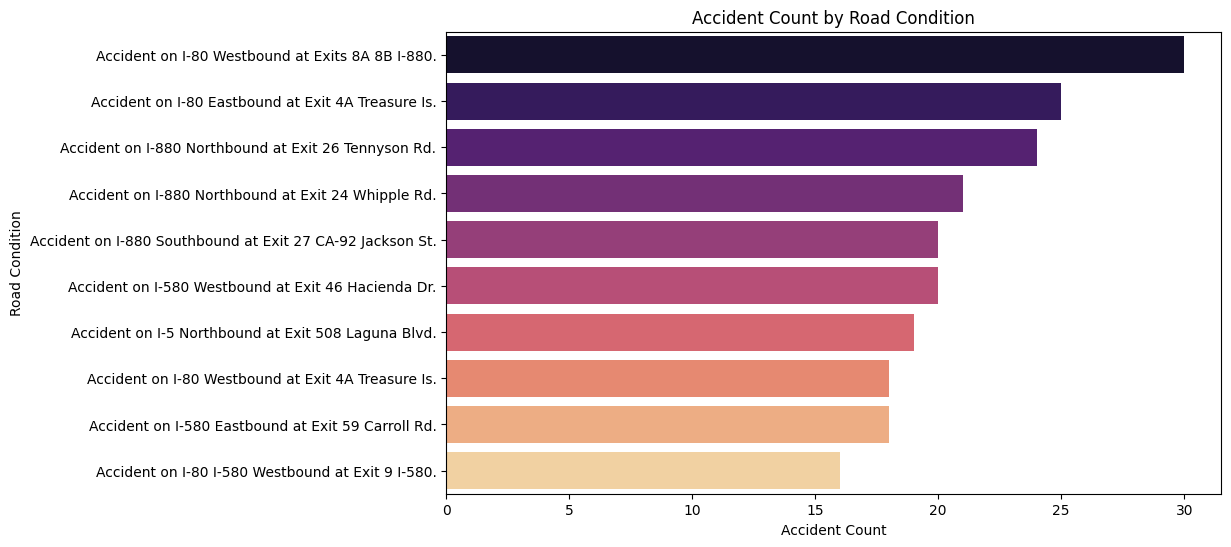

In [10]:
# Plot bar chart of accident count by road condition
plt.figure(figsize=(10, 6))
sns.countplot(y='Description', data=df, order=df['Description'].value_counts().iloc[:10].index, palette='magma')
plt.title('Accident Count by Road Condition')
plt.xlabel('Accident Count')
plt.ylabel('Road Condition')
plt.show()